# <center>Observing the Relationship Between Socioeconomic Factors and Voter Associations Across Counties in America</center>

## <center> Stat 477 Final Presentation </center>
### <center> By Phillip Chau </center>
### <center> 10/22/2020 </center> 


# <center> Introduction </center>
## Objectives
* Assess how different socioeconomic factors vary across America
* Analyze the relationship between the ruralness of a county and voter associations
* Understand factors that distinguish rural and urban communities
* Establish relationships between economic, health and social factors with rural and urban environments to gauge potential other predictors of voter associations
* Create a predictive model that uses socioeconomic factors to determine voter associations and answers our primary questions

## Key Question
* We primarily want to understand whether being in a more rural environment affects voter associations and if so, what factors separate rural and urban environments that could contribute to a county being more Republican vs Democratic.

Once we determine our primary question, we are interested in exploring rural and urban counties deeper and answering the following questions

### Exploratory Questions
* Does education level vary across rural and urban counties?
* How does income inequality and housing issues change across rural versus urban counties? 
* Does the amount of health care vary in rural and urban communities?
* Are education level, economic factors and health care significant in distinguishing a rural and urban environment and if so, what do they tell about voter associations? 

## Y Variable of Interest: Election Results 2016
* variable that describes whether Democrats or Republicans received the most votes during the 2016 Presidential Election in the given county
* Analyzing voter associations across states, we noticed that from our summary statistics and charts below a majority of states voted Republican in 2016, which makes sense given the eventual victory of Donald Trump 
* At the same time, we do notice that predominantly well known Democratic States like California and Hawaii were still in blue, following common past knowledge about the political standings of these states

In [117]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

county_data = pd.read_csv("/Users/phillipchau/Documents/Stat 477/project_477.csv",
                          index_col='Row.Label')


In [118]:
party = county_data.groupby(by=['State.Abbreviation', 'Election.Results.2016']).size().reset_index(name='counts')
vc = ['#0093f3', '#ff0000']
sns.set_palette(sns.color_palette(vc))
county_data.groupby(by=['Election.Results.2016', 'State.Abbreviation']).size().reset_index(name='counts')
democrats = county_data[county_data['Election.Results.2016'] == 'Democrat'].groupby(by='State.Abbreviation').size().reset_index(name='counts')
republicans = county_data[county_data['Election.Results.2016'] == 'Republican'].groupby(by='State.Abbreviation').size().reset_index(name='counts')


## Statistics of Voter Associations Across States
* As seen below, across America, there was a larger average number of Republican counties compared to Democratic counties in 2016
* The standard deviation of number of Republican counties across states seems to be larger than that of Democrats while the three quartiles are larger as well
* However, it's interesting to note that some known blue states like New York appear red in this case, but since this dataset sampled counties, meaning bigger urban areas will be weighted just as equally as any other smaller county in voter association count, perhaps this already hints at why there appears to be way less Democrats across the board
* These statistics are reflected in the bar graph below

In [119]:
print('Republican Voting Number Statistics Across States')
print(republicans['counts'].describe())
print(' ')
print('Democrat Voting Number Statistics Across States')
print(democrats['counts'].describe())

Republican Voting Number Statistics Across States
count     46.000000
mean      49.326087
std       38.280285
min        1.000000
25%       21.000000
50%       47.000000
75%       71.250000
max      195.000000
Name: counts, dtype: float64
 
Democrat Voting Number Statistics Across States
count    48.000000
mean      9.291667
std       8.113447
min       1.000000
25%       3.000000
50%       8.000000
75%      12.000000
max      36.000000
Name: counts, dtype: float64


## Voter Associations Across States

<AxesSubplot:xlabel='State.Abbreviation', ylabel='counts'>

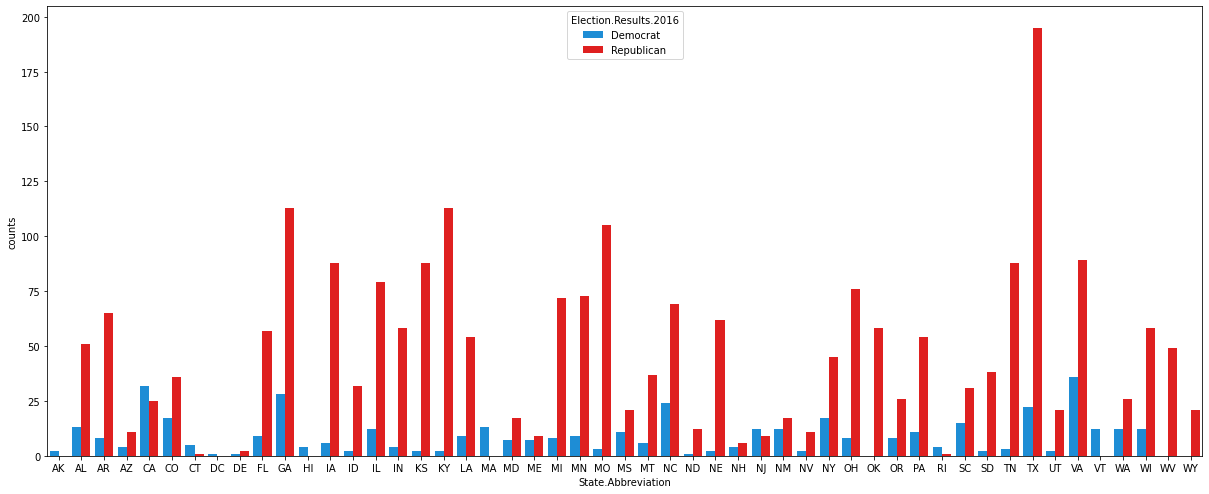

In [120]:
fig, ax = plt.subplots(figsize= (20.7, 8.27))
sns.barplot(ax = ax, x="State.Abbreviation", y="counts", hue="Election.Results.2016", palette = vc, data = party)


# Impact of Rural Environments on Voter Associations
* Now that we understand the y variable more, we first want to see how living in a rural environment is related to voter associations (Republican vs. Democrat)

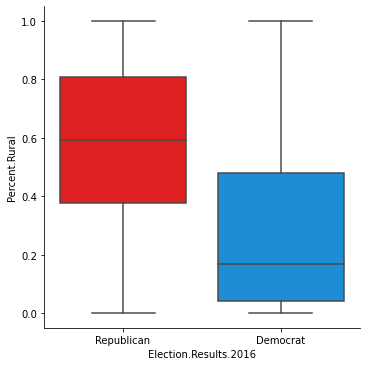

In [121]:
vote_colors = ['#ff0000', '#0093f3']
sns.set_palette(sns.color_palette(vote_colors))
#Does being in more rural areas affect voting trends
sns.catplot(x = 'Election.Results.2016', y = 'Percent.Rural', kind="box", data=county_data, palette= vote_colors)

## Impact of Rural Environments on Voter Associations
* As seen by the plot, it's evident that more rural counties tend to be more Republican
* To confirm a significant relation, we conduct a two sample T test as seen below
* Since the p-value is less than 0.05, we reject the null hypothesis and conclude Rural Environment is a significant factor
* Now, the bigger question is <b> what factors distinguish rural from urban environments that could explain this </b>

In [122]:
import statsmodels.api as sm
#Do a two sample t-test in order to determine if difference in populations is statistically significant
X1 = sm.stats.DescrStatsW(county_data['Percent.Rural'].loc[county_data['Election.Results.2016']=="Republican"])
X2 = sm.stats.DescrStatsW(county_data['Percent.Rural'].loc[county_data['Election.Results.2016']=="Democrat"])

comp_means = sm.stats.CompareMeans(X1, X2)
print(comp_means.summary(usevar='unequal'))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.2994      0.016     19.217      0.000       0.269       0.330


## Further Analysis of Rural Environments
* Rural environments seem to have a significant impact on voting results
* Let's analyze some relationships within rural environments that can help us understand what distinguishes rural from urban environments
* As seen by the graph below showing percent rural amongst states, we see states like New York or California which are known to have big cities have significantly smaller percentage compared to prominent rural states like Alabama

## Bar Graph of Percentage Rural across States

<AxesSubplot:xlabel='State.Abbreviation', ylabel='Percent.Rural'>

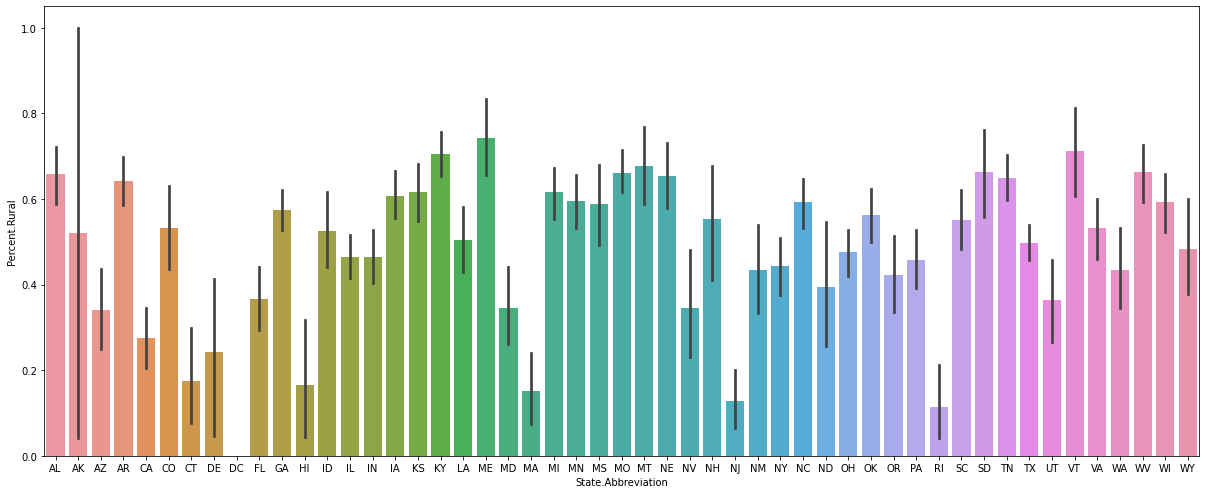

In [123]:
fig, ax = plt.subplots(figsize= (20.7, 8.27))
sns.barplot(ax = ax, x="State.Abbreviation", y="Percent.Rural", data=county_data)

## Over 65 Distribution Across States
* Interestingly, when we map out the distribution of percentage over 65 across states, the distribution is a bit similar to that of rural environments
* Let's do some further statistical analysis to answer <b> is there a relationship between old age and living in rural environments </b>

<AxesSubplot:xlabel='State.Abbreviation', ylabel='Over.65'>

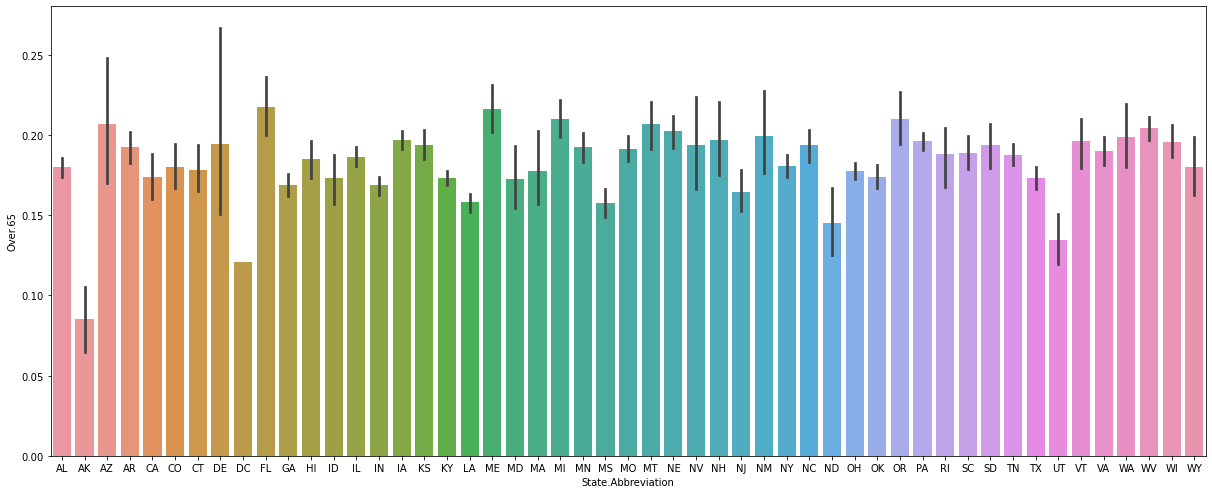

In [124]:
#Interesting how the distribution is almost identical. Map the relationship 
fig, ax = plt.subplots(figsize= (20.7, 8.27))
sns.barplot(ax = ax, x="State.Abbreviation", y="Over.65", data=county_data)

## Linear Plot of Over 65 Against Rural
* We do a linear plot below to see that more rural areas tend to have older populations
* Furthermore, breaking this apart by voter associations, we see that younger, more urban environments tend to be more Democratic while elderly, rural environments are more Republican
* Perhaps the elderly move to rural areas since rural environments tend to be slower and calmer compared to bustling urban areas
* At the same time, the conservative nature of the Republican party could align more with traditional and conservative views that the elderly tend to have
* In general though, according to the summary statistics it seems across America the over 65 percent is quite low, which further adds significance to the graph that shows Republicans taking up a majority of the higher over 65 percentages

count    2715.000000
mean        0.185704
std         0.044622
min         0.048000
25%         0.157000
50%         0.182000
75%         0.210000
max         0.569000
Name: Over.65, dtype: float64


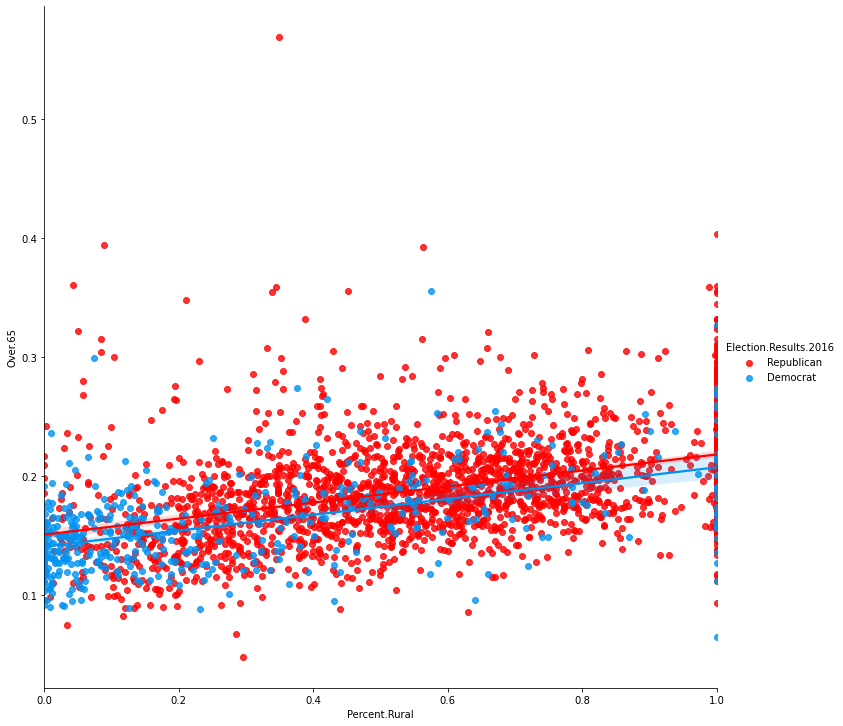

In [125]:
#Can see an obvious linear relationship here. A good sign that maybe age has something to do with one of the factors contributing to voter trends
print(county_data['Over.65'].describe())
sns.lmplot(x='Percent.Rural', y = 'Over.65', palette = vote_colors, hue = 'Election.Results.2016', data = county_data, height=10, aspect=1)

## Economic Factors Within Rural and Urban Environments
* <b> Sub Question: </b> How do economic factors vary within rural and urban environments?
* From the mosaic plot below, we created buckets of percent rural, with the left side being most urban to right being most rural and we see that more urban areas tend to have greater income inequality (more people in Q3 and Q4 brackets)


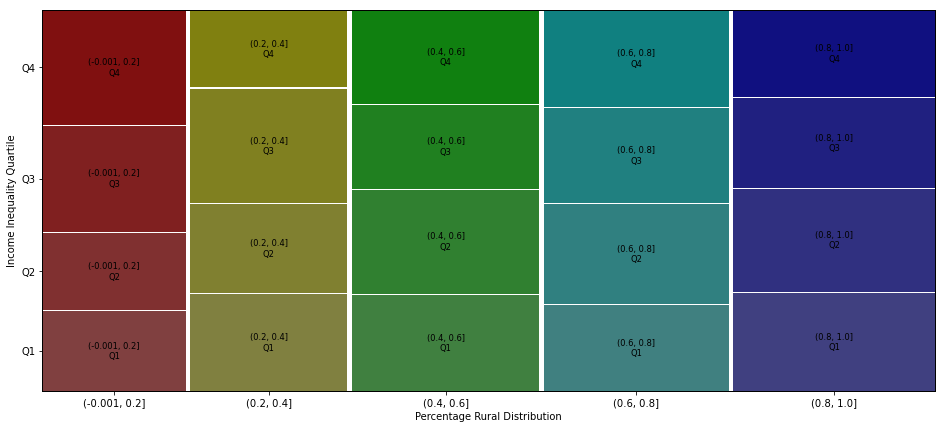

In [126]:
#Economic inequality within urban and rural areas
from statsmodels.graphics.mosaicplot import mosaic
county_data['cut_data'] = pd.cut(county_data['Percent.Rural'], bins = [0,0.2,0.4,0.6,0.8,1], include_lowest=True)
fig, ax1 = plt.subplots(figsize = (16, 7))
ax1.set(xlabel = 'Percentage Rural Distribution', ylabel = 'Income Inequality Quartile')
mosaic(county_data, ['cut_data', 'Income.Inequality.Quartile'], ax=ax1)
plt.show()

## Analysis of Economic Factors Within Rural and Urban Environments
* At the same time, we see that more urban areas tend to have greater median household income but also greater severe housing problems
* Interesting enough, seeing the distribution of median hosuehold income against percentage rural paints the idea that perhaps the abundance of wealthy opportunities within urban environments (e.g. tech jobs, investment banking) drives the economic gap within cities based on who has access to these opportunities
* Urban environments tend to be more crowded, with spaces occupied for more than just housing, which can potentially drive the greater housing issues in less rural areas
* Given these factors that distinguish rural and urban environments, it's possible that economic factors can help explain and predict the differences in voter associations between the two areas

[Text(0.5, 0, 'Percent Rural Distribution')]

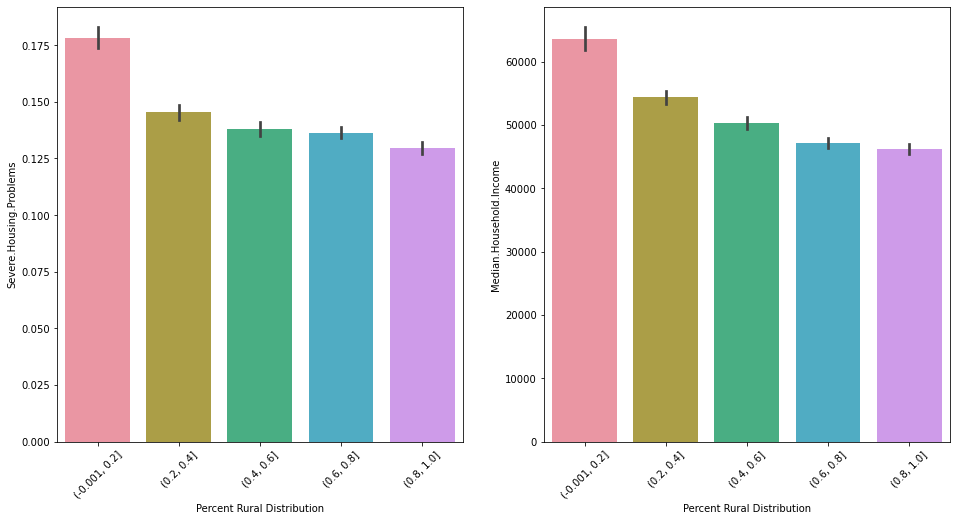

In [127]:
#Shows that even amongst urban vs rural economic disparity
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 8))
bar2 = sns.barplot(ax = ax1, x="cut_data", y = "Severe.Housing.Problems", data = county_data)
bar2.set_xticklabels(bar2.get_xticklabels(), rotation=45)
bar2.set(xlabel = "Percent Rural Distribution")
bar = sns.barplot(ax = ax2, x="cut_data", y="Median.Household.Income", data = county_data)
bar.set_xticklabels(bar.get_xticklabels(), rotation=45)
bar.set(xlabel = "Percent Rural Distribution")
#Look at the data based on america

## Education Levels Across Rural and Urban Environments
* <b> Sub-Question </b>: Does education level vary across urban and rural areas?
* As seen by the charts below, it appears that high school graduation rates are greater in more rural environments compared to urban

[Text(0, 0.5, 'Percent Rural Distribution')]

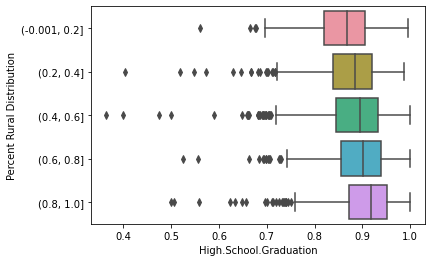

In [128]:
#Variations in high school grad level
ax = sns.boxplot(x = 'High.School.Graduation', y = 'cut_data', data = county_data)
ax.set(ylabel = 'Percent Rural Distribution')

## Education Levels Across Income Inequality 
* This is very intersting since earlier we stated that more rural areas tended to have less economic inequality. There's a possibility that these two could be related somehow. Let's have a quick look at how high school graduation rates vary amongst inequality brackets
* As seen below, since Q1 and Q2 have greater graduation rates, it does appear that there's a relationship between greater inequality areas and lower high school graduation rates, which could explain the relationship we saw previously since education may be harder to obtain in less prosperous areas

<AxesSubplot:xlabel='High.School.Graduation', ylabel='Income.Inequality.Quartile'>

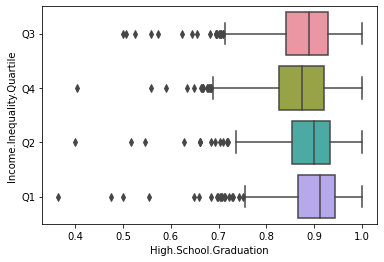

In [129]:
sns.boxplot(x = 'High.School.Graduation', y = 'Income.Inequality.Quartile', data = county_data)

## Education Levels Across America
* Out of curiosity, let's just see the distribution of high school graduation rates across America
* As seen below, it appears pretty good, with a mean rate of about 0.88 and a deviation of 0.07 
* While I initially thought education levels would be a good predictor, the low standard deviation makes me suspect it might not be as strong as I initially presumed. 

//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


count    2715.000000
mean        0.882899
std         0.070744
min         0.363000
25%         0.846900
50%         0.894500
75%         0.933600
max         1.000000
Name: High.School.Graduation, dtype: float64

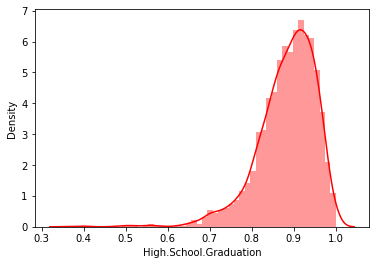

In [130]:
sns.distplot(county_data['High.School.Graduation'])
county_data['High.School.Graduation'].describe()

## Differences in Health Care within Rural and Urban Environments
* Lastly, let's see <b> if health care varies amongst rural and urban environments</b>, with health care being defined by the number of people uninsured and the number of available mental and primary care providers within the county
* As seen below, more urban areas tend to have more mental and primary care providers while also having less uninsured people compared to rural environments
* Perhaps this can relate back to the fact that rural environments tend to be less financially well off compared to urban environments, which hinders them in accessing these health care opportunities
* Given this analysis, maybe health care factors could help further explain the variations seen in voter associations between rural and urban counties

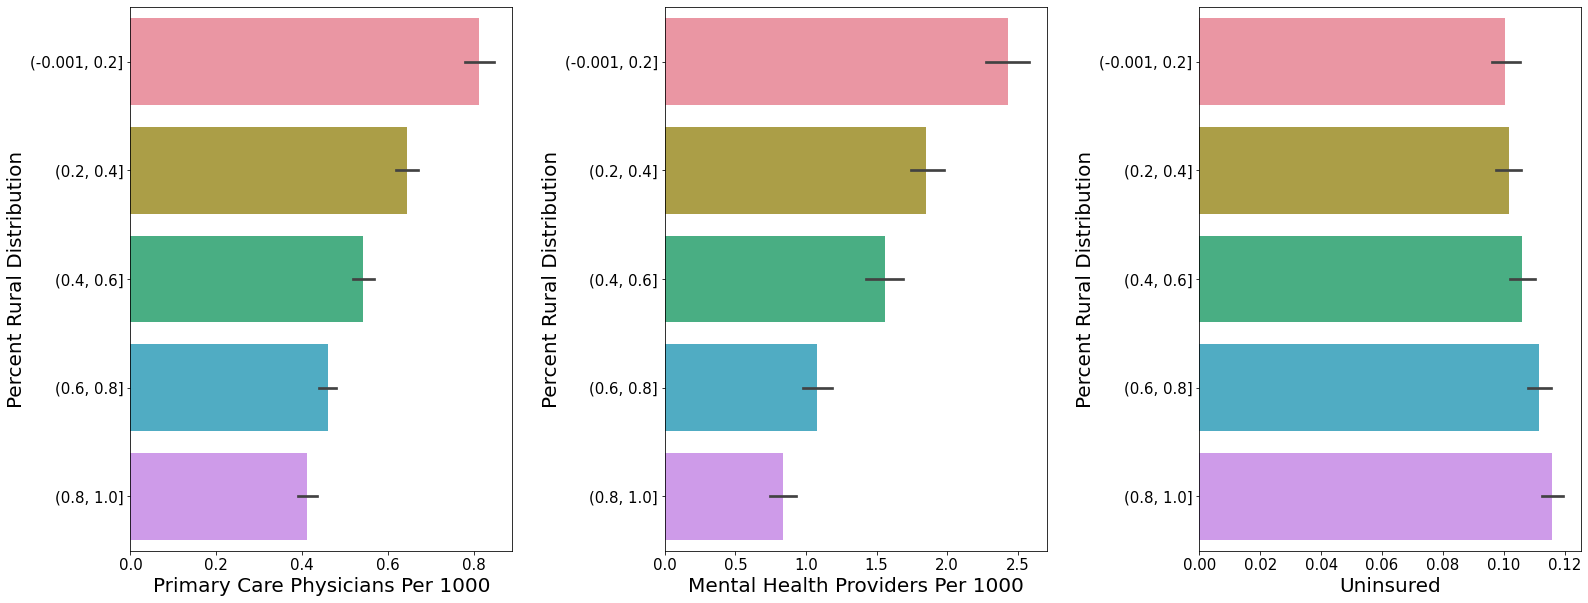

In [131]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols = 3, figsize=(26, 10))
a = sns.barplot(ax = ax1, x = 'Primary.Care.Physicians.Per.1000', y = 'cut_data', data = county_data)
b = sns.barplot(ax = ax2, x = 'Mental.health.providers.Per.1000', y = 'cut_data', data = county_data)
c = sns.barplot(ax = ax3, x = 'Uninsured', y = 'cut_data', data = county_data)
a.set_xlabel("Primary Care Physicians Per 1000", fontsize = 20)
a.set_ylabel("Percent Rural Distribution", fontsize = 20)
a.tick_params(labelsize=15)

b.set_xlabel("Mental Health Providers Per 1000", fontsize = 20)
b.set_ylabel("Percent Rural Distribution", fontsize = 20)
b.tick_params(labelsize=15)

c.set_xlabel("Uninsured", fontsize = 20)
c.set_ylabel("Percent Rural Distribution", fontsize = 20)
c.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4)

## Statistics of Mental Health Providers Per 1000
* Interestingly the standard deviation is just as high as the mean and we can see an obvious skew in the distribution from the distplot
* This adds further reason as to why I think this may be an interesting predictor given the high standard deviation

count    2715.000000
mean        1.486268
std         1.499236
min         0.042000
25%         0.474500
50%         1.036000
75%         1.992000
max        15.579000
Name: Mental.health.providers.Per.1000, dtype: float64


//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Mental.health.providers.Per.1000', ylabel='Density'>

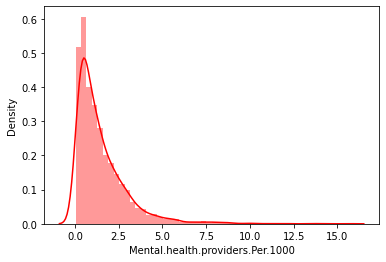

In [132]:
print(county_data['Mental.health.providers.Per.1000'].describe())
sns.distplot(county_data['Mental.health.providers.Per.1000'])

## Health Care Factors and Median Income
* As seen below, it does appear that having greater median household income relates to having greater primary care physicians and less uninsured people within the county, which could potentially explain the lower healthcare opportunities in rural environments

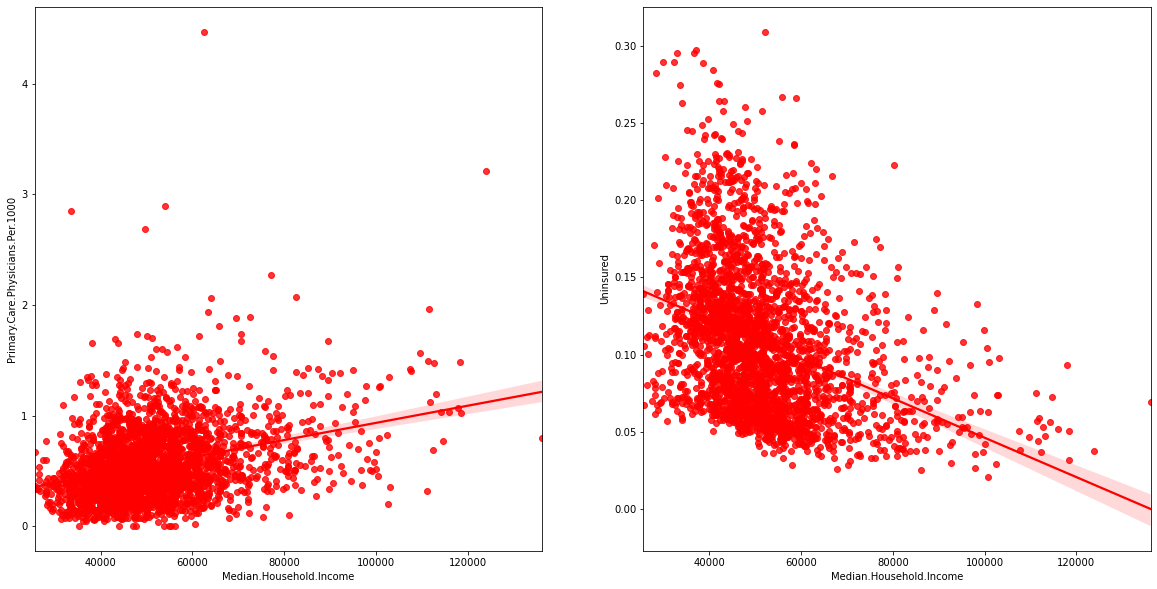

In [133]:
fig, (ax1, ax2) = plt.subplots(ncols = 2, figsize=(20, 10))
a = sns.regplot(ax = ax1, y = 'Primary.Care.Physicians.Per.1000', x = 'Median.Household.Income', data = county_data)
b = sns.regplot(ax = ax2, y = 'Uninsured', x = 'Median.Household.Income', data = county_data)

# Relationship between Health Care and Voter Associations
* Now that we saw that health care does vary depending on the environment, we ask <b> is there a relationship between health care opportunities within counties and voter associations </b> 
* After all, health care is an issue debated between both parties
* First we see how the number of uninsured people, primary care physicians and mental health care services vary amongst Republican and Democrat counties


# Levels of Uninsured People, Primary Care Physicians and Mental Health Providers within Counties
* From plots below, it seems that more Democratic counties offer more health service opportunities given that these counties tend to have more insured people while also offering primary and mental health care
* These trends are a good sign that perhaps health care levels could be a good predictor for voter associations


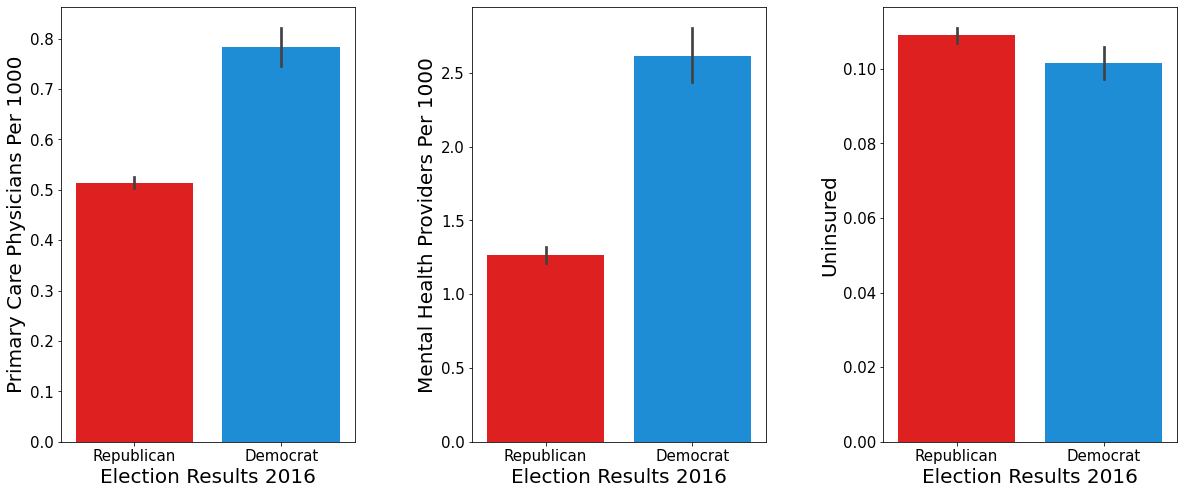

In [134]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(20, 8))
a = sns.barplot(ax = ax1, x="Election.Results.2016", y="Primary.Care.Physicians.Per.1000", data=county_data, palette = vote_colors)
b = sns.barplot(ax = ax2, x="Election.Results.2016", y="Mental.health.providers.Per.1000", data=county_data, palette = vote_colors)
c = sns.barplot(ax = ax3, x="Election.Results.2016", y="Uninsured", data=county_data, palette = vote_colors)

a.set_xlabel("Election Results 2016", fontsize = 20)
a.set_ylabel("Primary Care Physicians Per 1000", fontsize = 20)
a.tick_params(labelsize=15)

b.set_ylabel("Mental Health Providers Per 1000", fontsize = 20)
b.set_xlabel("Election Results 2016", fontsize = 20)
b.tick_params(labelsize=15)

c.set_ylabel("Uninsured", fontsize = 20)
c.set_xlabel("Election Results 2016", fontsize = 20)
c.tick_params(labelsize=15)

plt.subplots_adjust(wspace=0.4)

# Impacts of Economic Factors on Voter Associations
* Finally, let's see <b> if economic variables such as median income or income inequality within counties can impact voting associations </b>
* First, creating a mosaic plot of the income inequality distributions amongst Republicans and Democrats, we notice Q2 cutoff significantly varies between the two, with Democrats having much greater economic disparity compared to Republicans
* Comparing the Severe Housing Problems and Median Income within two parties, similar trends that were established before are seen again. Democrat counties tend to have greater housing problems yet greater income compared to Republican counties
* The severe housing problem seemed quite different between Republian and Democratic counties. Analyzing its summary statistics we notice that America as a whole has decently low average severe housing problems, which can make this an interesting predictor as it is quite different between parties


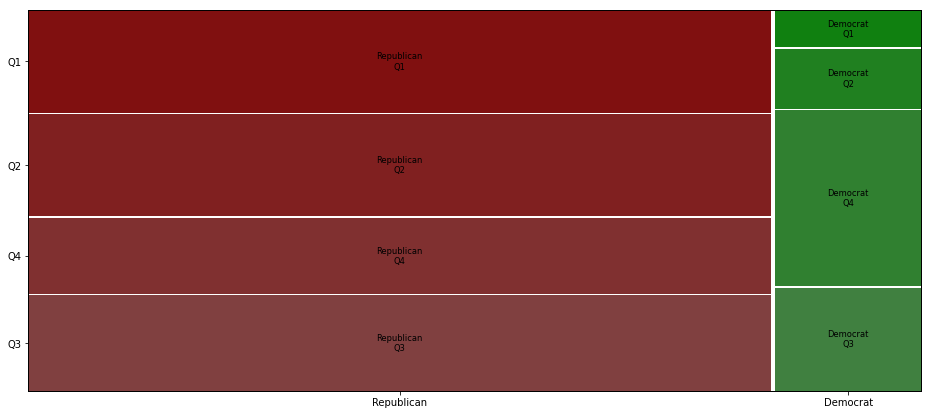

In [135]:
fig, ax1 = plt.subplots(figsize = (16, 7))
mosaic(county_data, ['Election.Results.2016', 'Income.Inequality.Quartile'], ax=ax1)
plt.show()

## Median Household Income and Severe Housing Problems against Election Results 2016

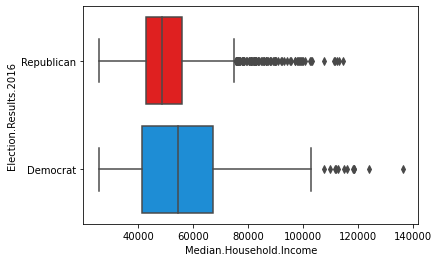

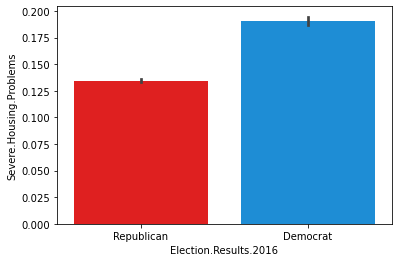

In [136]:
sns.boxplot(y = 'Election.Results.2016', x = 'Median.Household.Income', data = county_data, palette = vote_colors)
plt.show()
sns.barplot(x="Election.Results.2016", y="Severe.Housing.Problems", data=county_data, palette = vote_colors)
plt.show()

## Summary Statistics of Severe Housing Problems Across America

count    2715.000000
mean        0.143692
std         0.040969
min         0.030400
25%         0.115950
50%         0.139900
75%         0.164750
max         0.394100
Name: Severe.Housing.Problems, dtype: float64


//anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


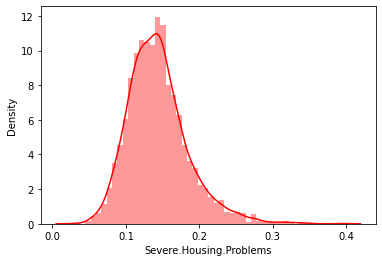

In [137]:
#Less employment if less educated
sns.distplot(county_data['Severe.Housing.Problems'])
print(county_data['Severe.Housing.Problems'].describe())

## Prediciting Voter Assoications based on Economic and Social Factors of Counties
* Now that we have analyzed our data thoroughly and have seen some variables that relate to certain voting associations, we now attempt to create a predictive model 
* Evidently, percentage rural, median household income, and level uninsured seemed to be driving factors in establishing certain voter associations and from our earlier analysis, we saw that these had cascading impacts on other variables as well 
* Thus, along with percent rural, we will determine if number of uninsured people, primary care physician levels, mental health providers per 1000 levels, high school graduation, median household income, severe housing problems, unemployment and income inequality quartile can all help predict voter associations
* Since there's a strong collinearity between rural and over 65, we will also do linear regression to determine if there's a correlation between age and voter associations

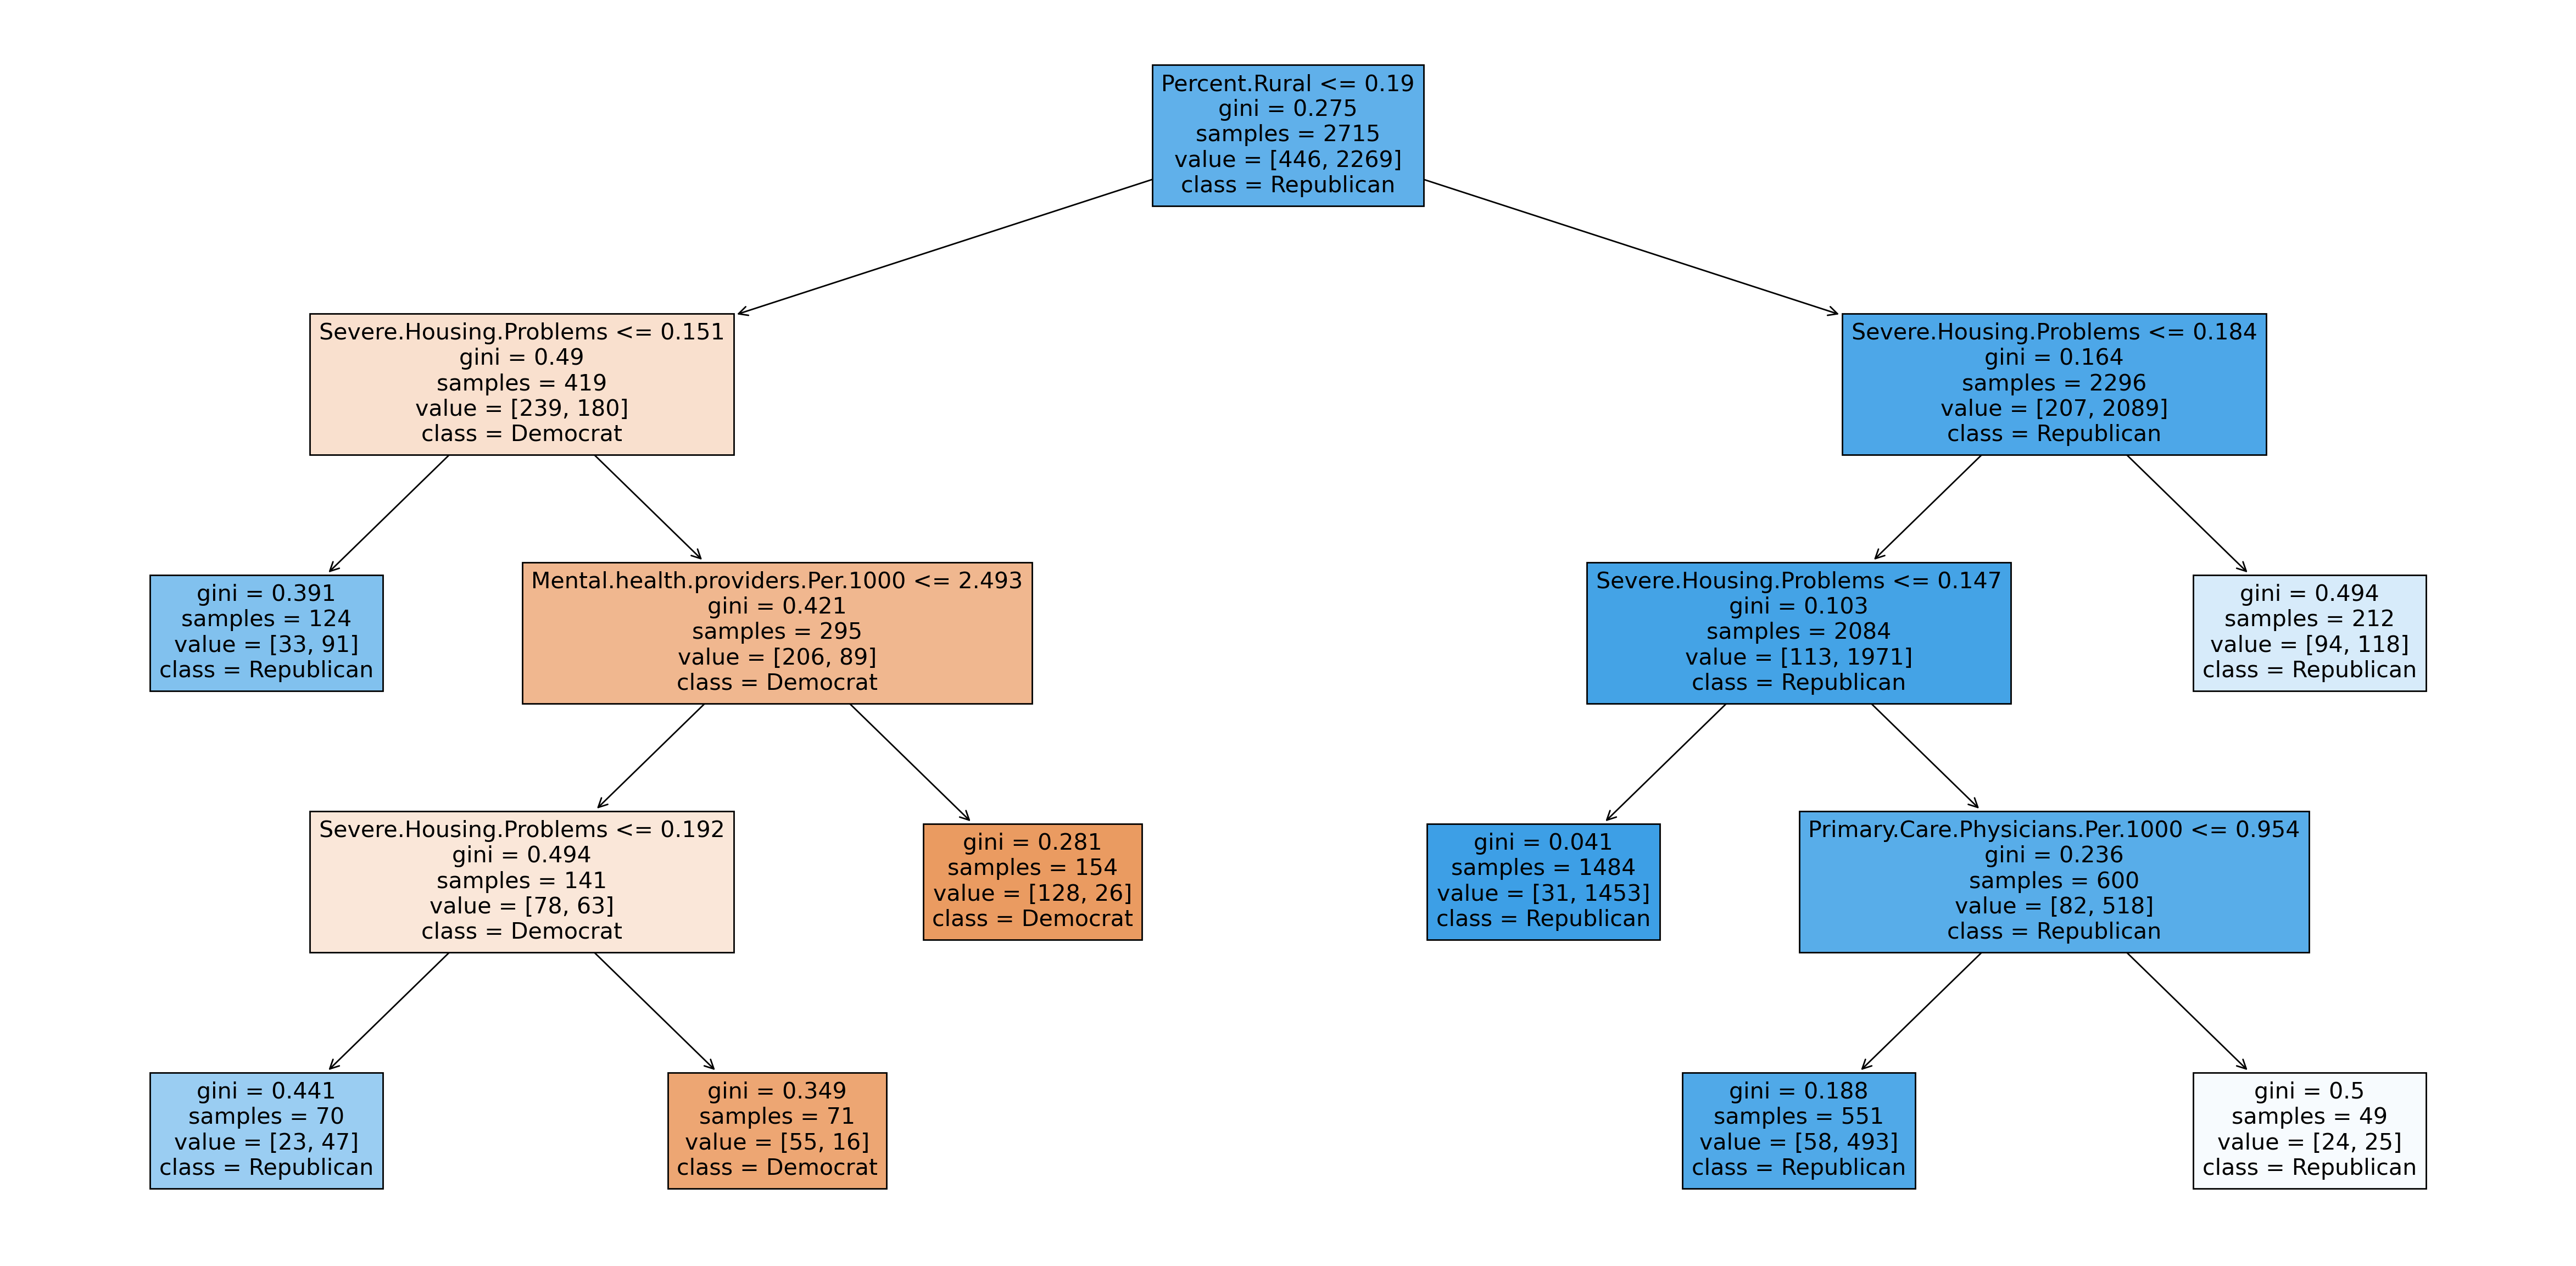

In [138]:
Xcts = county_data[['Uninsured', 'High.School.Graduation', 'Median.Household.Income', 'Severe.Housing.Problems',
                   'Unemployment', 'Percent.Rural', 'Primary.Care.Physicians.Per.1000', 'Mental.health.providers.Per.1000']]
XcatUpdate = pd.get_dummies(county_data['Income.Inequality.Quartile'], drop_first = True)
#6d. (1pt.)
X = pd.merge(Xcts, XcatUpdate, left_index = True, right_index = True)
y = pd.get_dummies(county_data['Election.Results.2016'], drop_first=True)
from sklearn import tree
regtree = tree.DecisionTreeClassifier(max_leaf_nodes = 8, random_state = 1940)
regtree = regtree.fit(X, y)
fig = plt.figure(num = None, figsize=(30, 15), dpi = 200, facecolor = 'w', edgecolor = 'k')
tree.plot_tree(regtree, filled=True, feature_names=X.columns, class_names = ['Democrat', 'Republican'])
plt.show()

## Variable Importance

In [139]:
importances = pd.DataFrame({'Feature':X_train.columns, 'Importance':np.round(best_tree.feature_importances_,3)})
importances = importances.sort_values('Importance',ascending=False)
print(importances)

                             Feature  Importance
5                      Percent.Rural       0.418
3            Severe.Housing.Problems       0.247
2            Median.Household.Income       0.101
0                          Uninsured       0.066
6   Primary.Care.Physicians.Per.1000       0.055
7   Mental.health.providers.Per.1000       0.053
4                       Unemployment       0.043
8                                 Q2       0.018
1             High.School.Graduation       0.000
9                                 Q3       0.000
10                                Q4       0.000


## Regression of Over 65 and Election Results 2016

In [140]:
#Do a two sample t-test in order to determine if difference in populations is statistically significant
X1 = sm.stats.DescrStatsW(county_data['Over.65'].loc[county_data['Election.Results.2016']=="Republican"])
X2 = sm.stats.DescrStatsW(county_data['Over.65'].loc[county_data['Election.Results.2016']=="Democrat"])

comp_means = sm.stats.CompareMeans(X1, X2)
print(comp_means.summary(usevar='unequal'))

                          Test for equality of means                          
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
subset #1      0.0304      0.002     14.574      0.000       0.026       0.034


## Findings
* According to variable importance, it appears Percent Rural, Severe Housing Problems and Median Household Income are top 3 predictors of voter associations within counties
* This is evident in our tree, as it tells us that counties that have a percent rural of less than or equal to 0.19 (which potentially defines the line between urban and suburban/rural), severe housing problems of greater than 0.151 and mental health providers per 1000 of greater than 2.493 tend to be Democratic, as evidenced by the fact that this combination results in 128 Democrats out of 154 sampled (83%)  
* Similarly, counties that have percent rural of greater than 0.19 and severe housing problems of less than or equal to 0.147 tend to be Republican, as evidenced by the fact that this combination results in 1453 Republicans out of 1484 sampled (97.9%)

## Conclusion 
* In the end, we see that the ruralness of a county does indeed relate to voter associations, answering our initial question. At same time, we analyzed what factors separated rural and urban counties to help us make a more nuanced point on why rural vs urban may have a significant relationship to voter associations
* From today’s analysis, we saw that more urban, younger counties tended to be more Democratic while at the same time, we learned that perhaps greater median income areas tended to be more Democratic, but also face greater economic inequality, severe housing issues and provided greater health services compared to Republican counties
* We also saw from the regression that there's some positive association between old age and voting Republican, which makes sense given that we concluded elderly people tended to live in rural areas
* All the variables analyzed in our tree gives us potential indicators to predict the voter associations of a given county and help us learn how socioeconomic factors play a role in voter associations